<div>
    <div style="float:left;width:50%;text-align:center">
        <h1>pyGIMLi Tutorial @ Transform 2021</h1>
        <div>
<table style="border-collapse:collapse;border-color:#ccc;border-spacing:0" class="tg"><thead><tr><th style="background-color:#f0f0f0;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal"></th><th style="background-color:#f0f0f0;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">Info</th></tr></thead><tbody><tr><td style="background-color:#f9f9f9;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">When</td><td style="background-color:#f9f9f9;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">Monday, April 19 • 8:00 - 9:00 UTC (starts at 10.00 a.m. CET)</td></tr><tr><td style="background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">Slack (Q&amp;A)</td><td style="background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;text-decoration:underline;vertical-align:top;word-break:normal"><a href="https://softwareunderground.org/">Software Underground</a> channel <a href="https://swung.slack.com/archives/C01T5V5S9EV">#t21-mon-pygimli</a></td></tr><tr><td style="background-color:#f9f9f9;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">Live stream</td><td style="background-color:#f9f9f9;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;text-decoration:underline;vertical-align:top;word-break:normal"><a href="https://youtu.be/w3pu0H3dXe8">https://youtu.be/w3pu0H3dXe8</a></td></tr><tr><td style="background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">pyGIMLi documentation</td><td style="background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;text-decoration:underline;vertical-align:top;word-break:normal"><a href="https://www.pygimli.org/documentation.html">https://www.pygimli.org/documentation.html</a></td></tr></tbody></table>
        </div>
    </div>
    <div style="float:right;width:30%">
        <img src="https://www.pygimli.org/_images/pg_logo.png" alt="pyGIMLi logo">
    </div>
</div>

---
# Simulating crosshole traveltime measurements

## Objectives

In this tutorial, we want to:
1. Read the geometry created in the [first notebook](./1_Creating_a_subsurface_model.ipynb)
2. Define two wells with seismic sources and receivers
3. Populate the subsurface model with parameters (seismic slownesses)
4. Simulate traveltime measurements with noise

---

In [2]:
# Just some plotting settings
import matplotlib.pyplot as plt
plt.style.use("seaborn-notebook")
%config InlineBackend.figure_format='svg' # Setting figure format for this notebook

## Read in the previously defined geometry

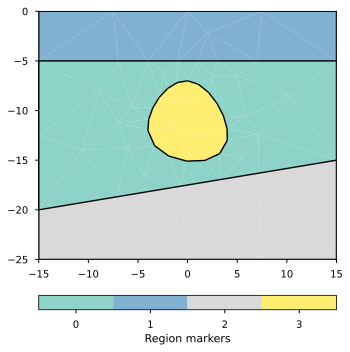

In [3]:
import pygimli as pg
import pygimli.meshtools as mt

geometry = mt.readPLC("geometry.poly")
geometry.scale([0.5, 1, 1])

ax, _ = pg.show(geometry)

## Define source and receiver positions

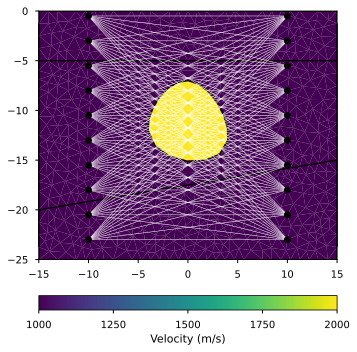

In [41]:
import numpy as np

n = 10 # number of sources and receivers per borehole
borehole = np.ones((n, 2)) * 10 # right borehole at x = 10 m
borehole[:,1] = np.linspace(-.5, -23, n) # down to 23 m depth

sensors = np.vstack([borehole] * 2)
sensors[n:,0] *= -1 # left borehole at x = -10 m

ax.plot(sensors[:,0], sensors[:,1], "ko")
ax.figure

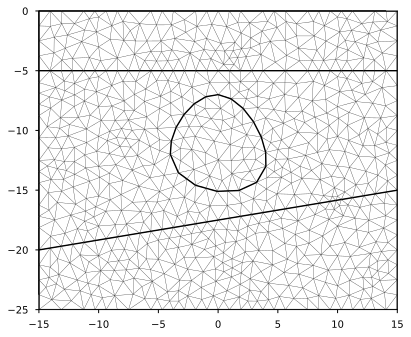

In [42]:
for pos in sensors:
    geometry.createNode(pos)
    
mesh = mt.createMesh(geometry, quality=33.5, area=1)
pg.show(mesh);

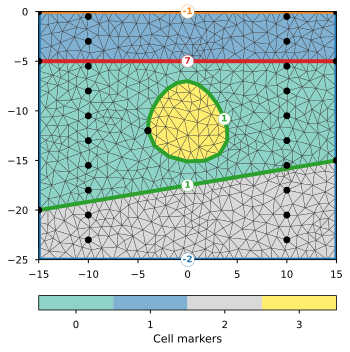

In [43]:
ax, _ = pg.show(mesh, markers=True, showMesh=True)
ax.plot(sensors[:,0], sensors[:,1], "ko")

# WILL BE MOVED TO PG-FUNCTION LATER

In [44]:
sensors[0]

array([10. , -0.5])

In [45]:
sensors[-1]

array([-10., -23.])

In [46]:
import numpy as np
import pygimli as pg
n = 10
from itertools import product
numbers = np.arange(n)
rays = list(product(numbers, numbers + n))

# Empty container
scheme = pg.DataContainer()

# Add sensors
for sen in sensors:
    scheme.createSensor(sen)

# Add measurements
rays = np.array(rays)
scheme.resize(len(rays))
scheme["s"] = rays[:, 0]
scheme["g"] = rays[:, 1]
scheme["valid"] = np.ones(len(rays))
scheme.registerSensorIndex("s")
scheme.registerSensorIndex("g")



In [47]:
v = np.array([1000,1000,1000,2000])[mesh.cellMarkers()]

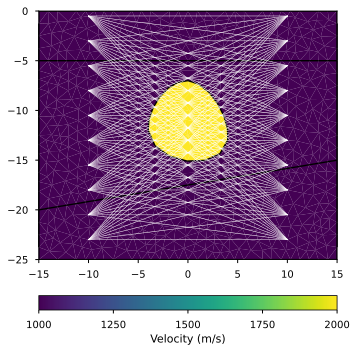

In [48]:
ax, _ = pg.show(mesh, v, label=pg.unit("vel"));
for ray in rays:
    ax.plot(sensors[ray, 0], sensors[ray, 1], "w-", lw=0.5)

In [49]:
from pygimli.physics.traveltime import TravelTimeManager
tt = TravelTimeManager()
data = tt.simulate(mesh=mesh, scheme=scheme, slowness=1/v,
                   secNodes=4, noiseLevel=0.001, noiseAbs=1e-5, seed=1337)

17/04/21 - 23:31:03 - pyGIMLi - INFO - Creating refined mesh (secnodes: 4) to solve forward task.


(<AxesSubplot:>, None)

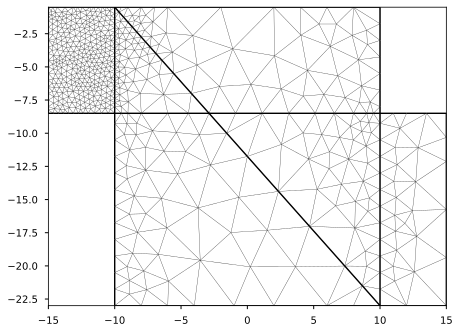

In [50]:
tt = TravelTimeManager()

invmesh = tt.createMesh(data=data, paraMaxCellSize=0.1)
pg.show(invmesh)

In [82]:
invmodel = tt.invert(data, secNodes=3, lam=1000, zWeight=1.0,
                     useGradient=False, verbose=True)

17/04/21 - 22:58:52 - pyGIMLi - INFO - Found 2 regions.
17/04/21 - 22:58:52 - pyGIMLi - INFO - Region with smallest marker set to background (marker=0)
17/04/21 - 22:58:52 - pyGIMLi - INFO - Creating forward mesh from region infos.
17/04/21 - 22:58:52 - Core - WARNING - Region Nr: 0  is background and should not get a model transformation.
17/04/21 - 22:58:52 - Core - WARNING - Region Nr: 0  is background and should not get a model control.
17/04/21 - 22:58:52 - pyGIMLi - INFO - Creating refined mesh (secnodes: 3) to solve forward task.
17/04/21 - 22:58:52 - pyGIMLi - INFO - Starting inversion.
17/04/21 - 22:58:52 - pyGIMLi - INFO - Create constant starting model: 0.0009305017672912952
17/04/21 - 22:58:52 - pyGIMLi - INFO - Created startmodel from forward operator: 35 [0.0009305017672912952, 0.0009305017672912952, 0.0009305017672912952, 0.0009305017672912952, 0.0009305017672912952, 0.0009305017672912952, 0.0009305017672912952, 0.0009305017672912952, 0.0009305017672912952, 0.00093050176

fop: <pygimli.physics.traveltime.TravelTimeManager.TravelTimeDijkstraModelling object at 0x7f31a11b1ef0>
Data transformation: <pygimli.core._pygimli_.RTrans object at 0x7f31a11b1770>
Model transformation: <pygimli.core._pygimli_.RTransLog object at 0x7f31a11b1bd0>
min/max (data): 0.020/0.020
min/max (error): 0.15%/0.15%
min/max (start model): 9.3e-04/9.3e-04
--------------------------------------------------------------------------------


RuntimeError: /home/florian/git/gimli/trunk/core/src/sparsematrix.h:342		GIMLI::SparseMapMatrix<ValueType, IndexType>::MatElement GIMLI::SparseMapMatrix<ValueType, IndexType>::Aux::operator[](IndexType) [with ValueType = double; IndexType = long unsigned int; GIMLI::SparseMapMatrix<ValueType, IndexType>::MatElement = GIMLI::MatrixElement<double, long unsigned int, std::map<std::pair<long unsigned int, long unsigned int>, double, std::less<std::pair<long unsigned int, long unsigned int> >, std::allocator<std::pair<const std::pair<long unsigned int, long unsigned int>, double> > > >]  idx = 18446744073709551615, 0 maxcol = 35 stype: 0